# 02 Basic Visualization 

- Area Plots
- Histograms
- Bar Charts

# Downloading and Preparing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

## Clean up data
>make modifications to the original dataset to create the visualizations.

### 1. Remove columns
>Clean up the dataset to remove columns that are not informative to us for visualization (Type, AREA, REG. DEV, Coverage)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.shape

(195, 38)

### 2. Rename columns 

In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### 3. Convert column labels type to string

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
all(isinstance(column, str) for column in df_can.columns)

True

### 4. Set country name as index
>for quickly looking up countries using .loc method.

In [10]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


### 5. Add total column

In [11]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
print (f'data dimensions: {df_can.shape}')

data dimensions: (195, 38)


### 6. Create a list of years from 1980 - 2013
> used for plotting the data

In [13]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

# Area Plots

>Create a cumulative plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

>The cumulative plot is also known as a Stacked Line Plot or Area plot.

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib.pyplot as plt

In [15]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [16]:
# get the top 5 countries
df_top5 = df_can.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [17]:
# get the top 5 countries by years
df_top5 = df_top5[years]
df_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [18]:
# transpose the top 5 countries by years
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


### Unstacked area plot with  default transparency (alpha value = 0.5)

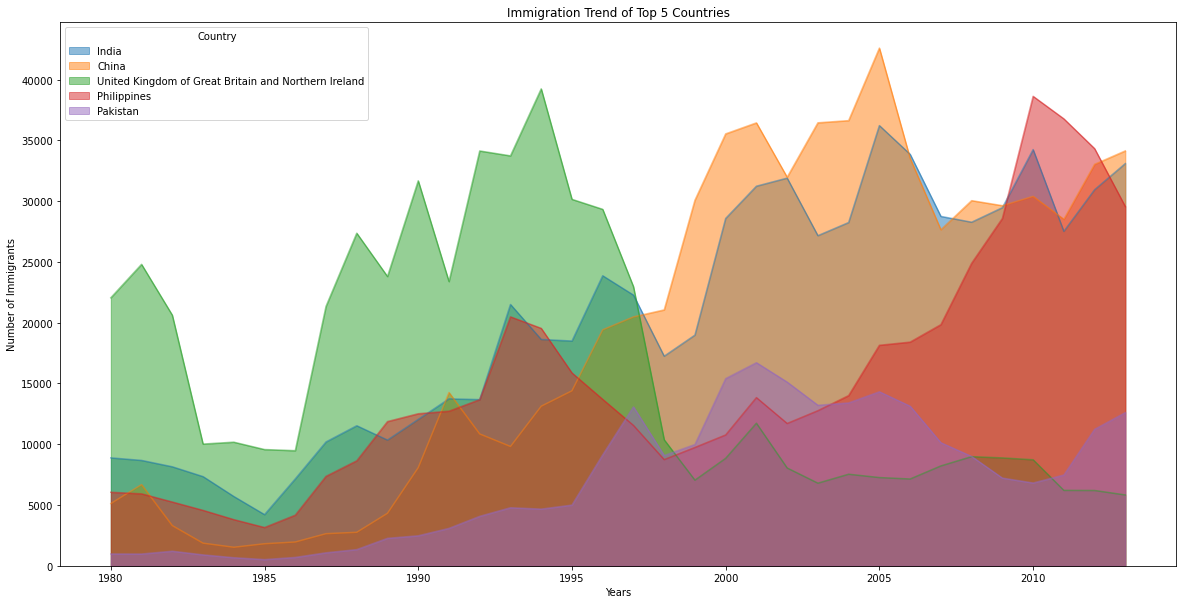

In [19]:
# change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int) 

df_top5.plot(kind='area', 
             stacked=False, # to produce an unstacked plot
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.savefig('../figs/02_Basic/immigration_trend_top5_countries_default_alpha.png')

plt.show()

### Unstacked area plot with modified transparency (alpha value = 0.25)

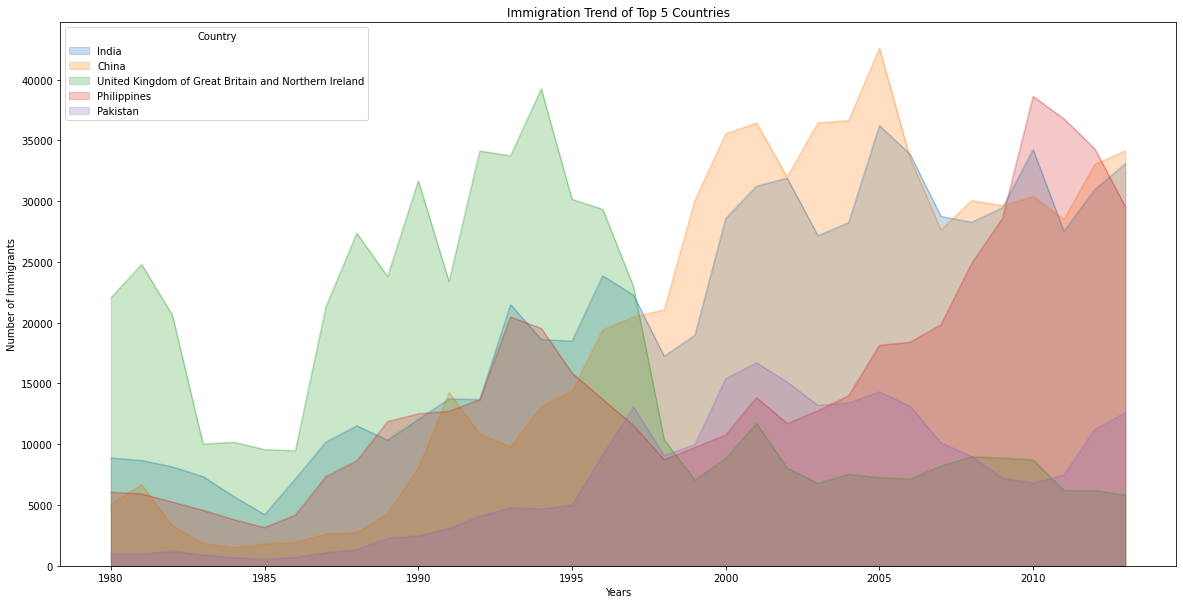

In [20]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.savefig('../figs/02_Basic/immigration_trend_top5_countries_modified_alpha.png')

plt.show()

## Two types of plotting

### 1. Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' 

Text(0.5, 0, 'Years')

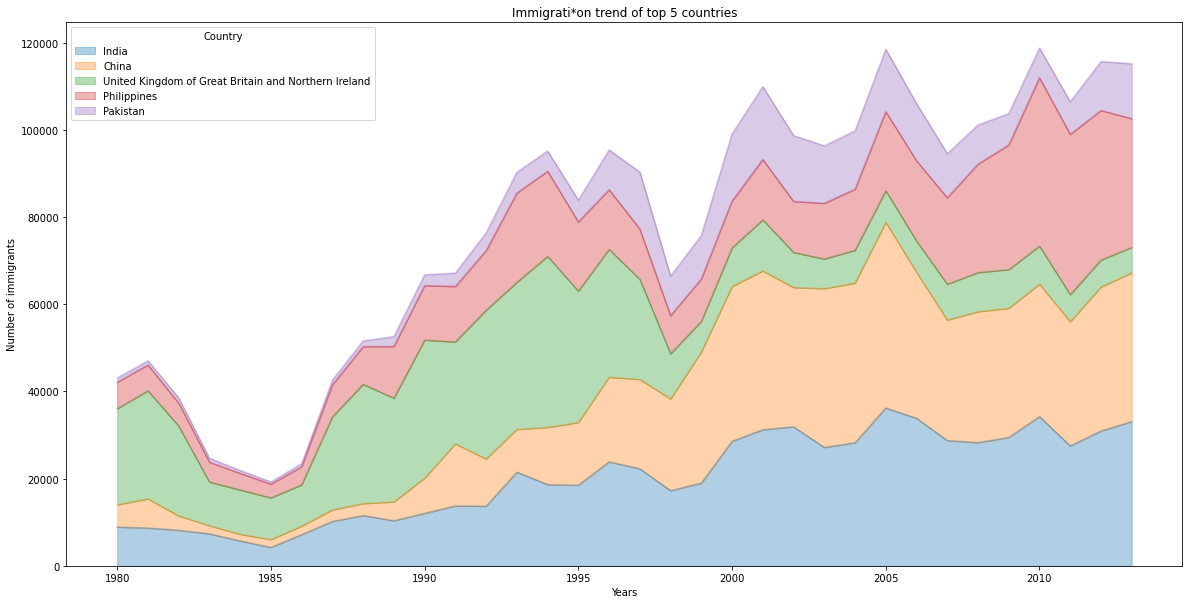

In [21]:
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigrati*on trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

### 2. Artist layer (Object oriented method) - using an Axes instance from Matplotlib 

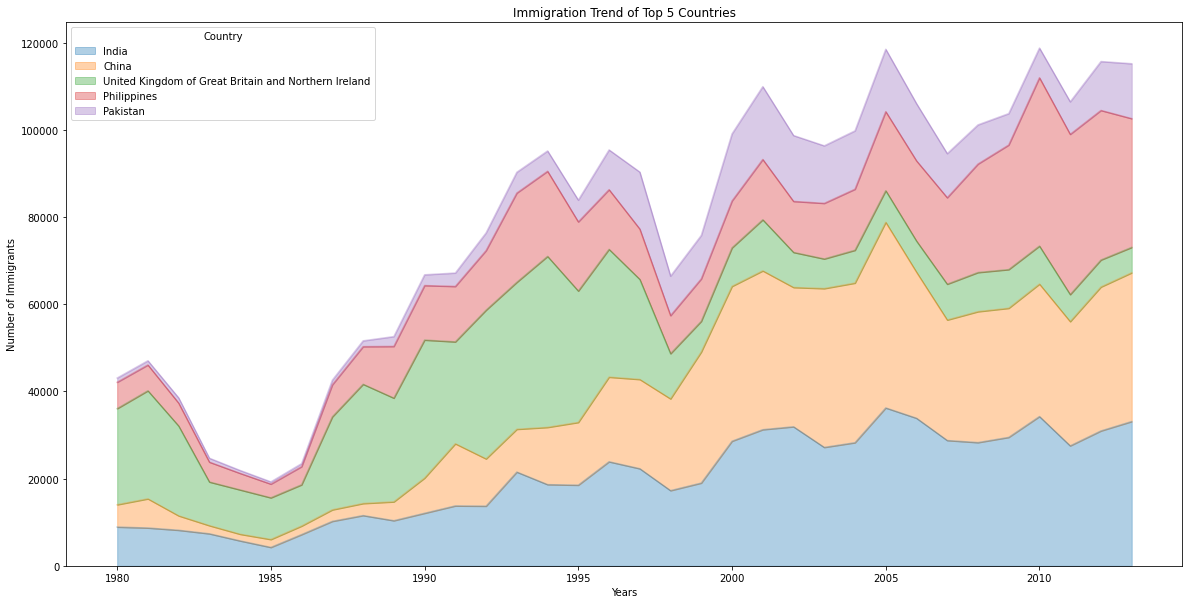

In [22]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years');

### Create plot of the 5 countries with least to immigration to Canada

### Using Scripting Layer 

>Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [23]:
df_least5 = df_can.tail()
df_least5 = df_least5[years].transpose()
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


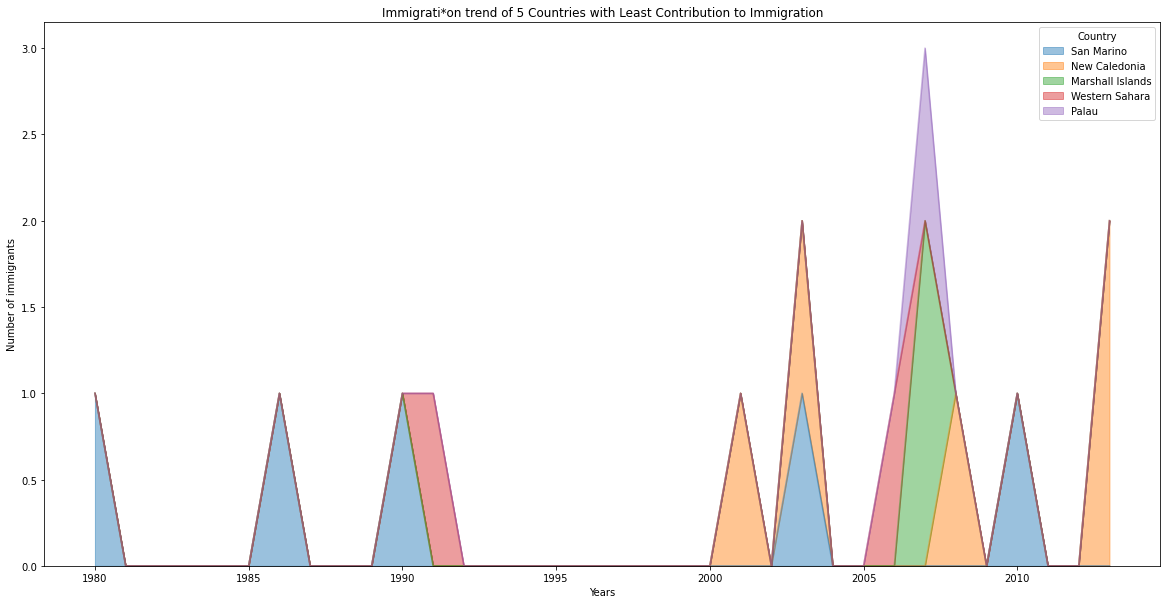

In [24]:
df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.title('Immigrati*on trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of immigrants')
plt.xlabel('Years');

plt.savefig('../figs/02_Basic/immigration_trend_least5_countries.png')

plt.show()

### Using Artist Layer 

>Use the artist layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

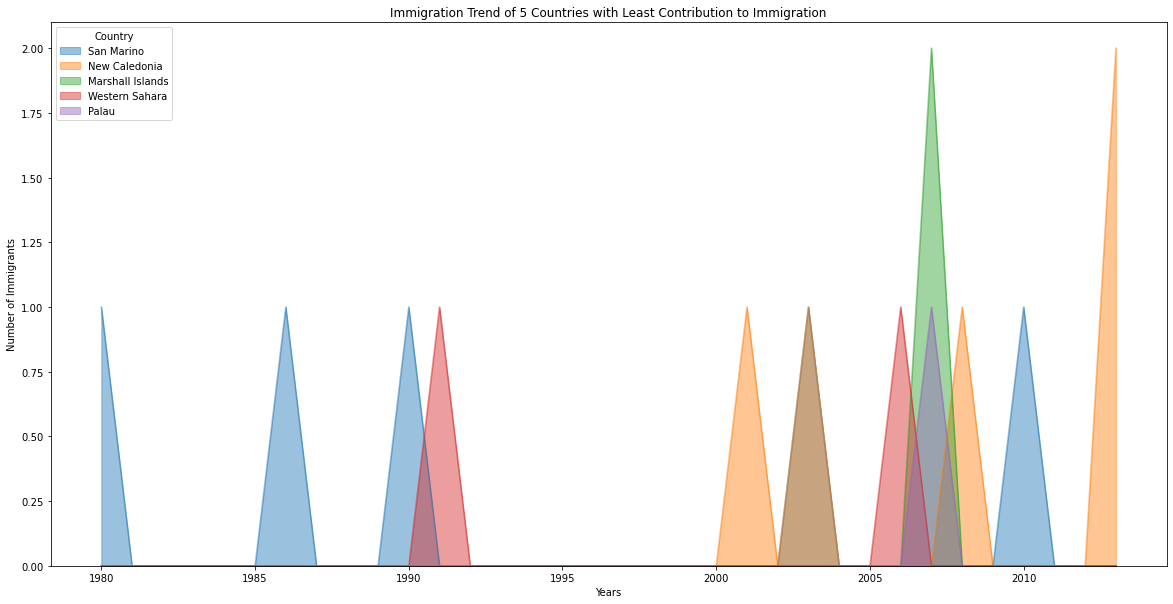

In [25]:
ax = df_least5.plot(kind='area', alpha=0.45, stacked=False, figsize=(20, 10))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years');

# Histograms

>a way of representing the frequency distribution of numeric dataset. 

>It partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. 

>The y-axis is the frequency or the number of data points in each bin. 

## New Immigrants Histogram Plot
>What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [26]:
# examine the data split into intervals. 
# use Numpy's histrogram method to get the bin ranges and frequency counts 

# view the 2013 dat
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [27]:
count, bins_edges = np.histogram(df_can['2013'])

print(f'Freqency count: {count}')
print(f'Bin ranges: {bins_edges}')
      

Freqency count: [178  11   1   2   0   0   0   0   1   2]
Bin ranges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


![](../images/histogram_count_bins.jpeg)

>By default, the histrogram method breaks up the dataset into 10 bins. 

>The figure  summarizes the bin ranges and the frequency distribution of immigration in 2013. 
We can see that in 2013:
- 178 countries contributed between 0 to 3412.9 immigrants
- 11 countries contributed between 3412.9 to 6825.8 immigrants
- 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

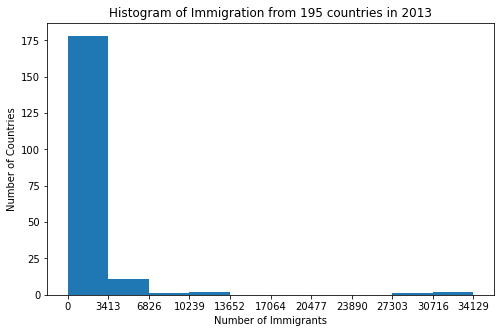

In [28]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.savefig('../figs/02_Basic/immigration_from_195_countries_histogram.png')

plt.show() 

## Denmark, Norway, and Sweden Histogram 
>What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [29]:
# view Denmark, Norway, and Sweden dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


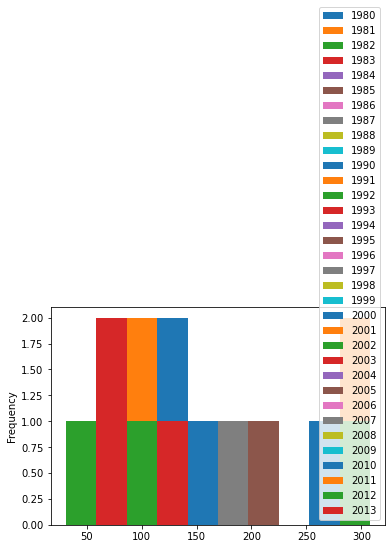

In [30]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist();

>Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

In [31]:
# transposing the dataset, and then plotting 

# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


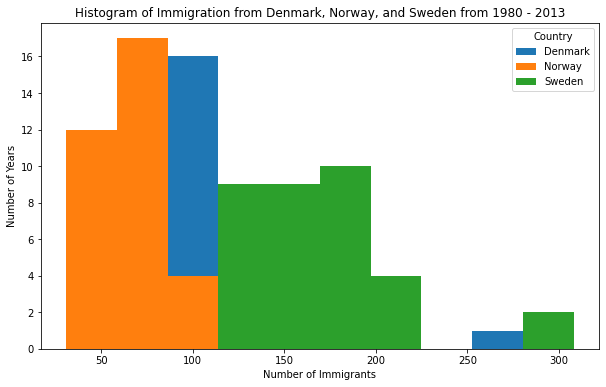

In [32]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Modifications to improve the impact and aesthetics of the plot

- increase the bin size to 15 by passing in bins parameter
- set transparency to 60% by passing in alpha paramemter
- label the x-axis by passing in x-label paramater
- change the colors of the plots by passing in color parameter

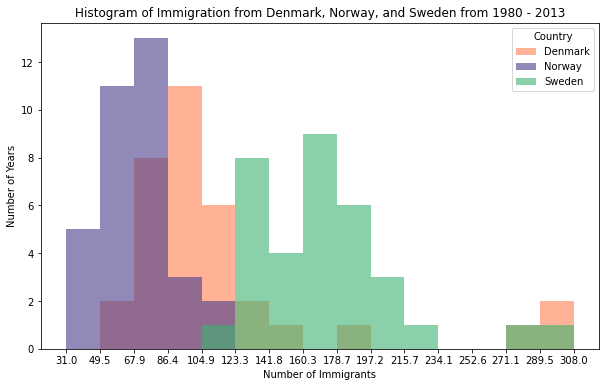

In [33]:
# get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

>Use the stacked paramemter to prevent plots to overlap each other, 

>Adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. 

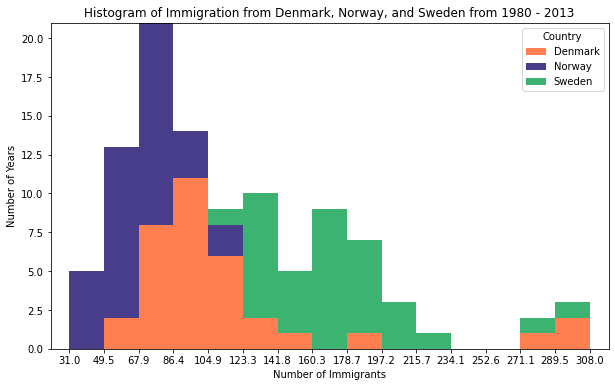

In [34]:
ount, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.savefig('../figs/02_Basic/immigration_from_denmarl_norway_sweden_histogram.png')

plt.show() 

## Greece, Albania, and Bulgaria Histogram

>Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? 

>Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [35]:
# view Greece, Albania, and Bulgaria dataset 
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria' ], years].transpose()
df_gab.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


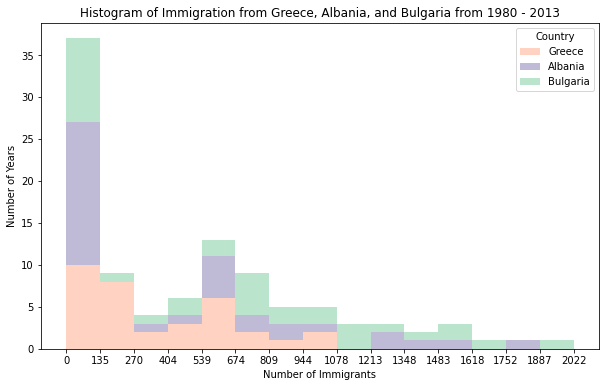

In [36]:
count, bin_edges = np.histogram(df_gab, 15)

# Un-stacked Histogram
df_gab.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          alpha=0.35
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.savefig('../figs/02_Basic/immigration_from_greece_albania_bulgaria_histogram.png')

plt.show() 

# Bar Charts

> way of representing data where the length of the bars represents the magnitude/size of the feature/variable. 

>Bar graphs usually represent numerical and categorical variables grouped in intervals.

## Vertical Bar Plot

## Analyzing the effect of Iceland's Financial Crisis

### Compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [37]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

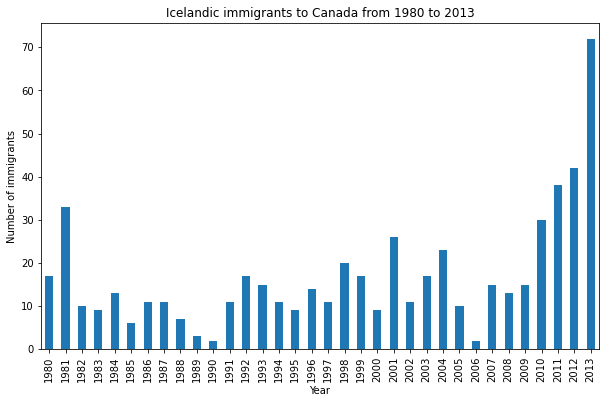

In [38]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

>See the impact of the financial crisis; the number of Icelandic immigrants to Canada started increasing rapidly after 2008

### Add Annotations

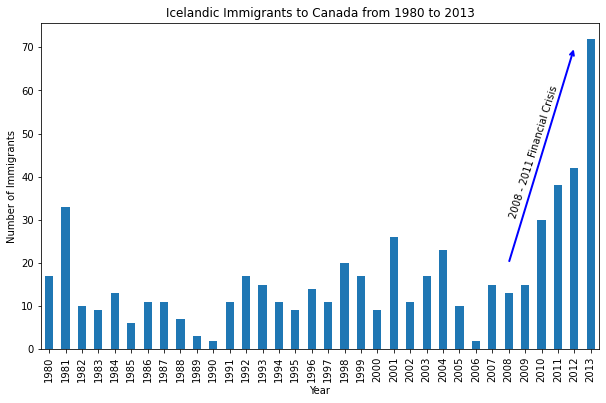

In [39]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.savefig('../figs/02_Basic/icelandic_immigrants_bar.png')

plt.show()

## Horizontal Bar Plot

>Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

### Step 1: Get the data pertaining to the top 15 countries

In [40]:
df_can.sort_values(by='Total', ascending=True, inplace=True)

df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

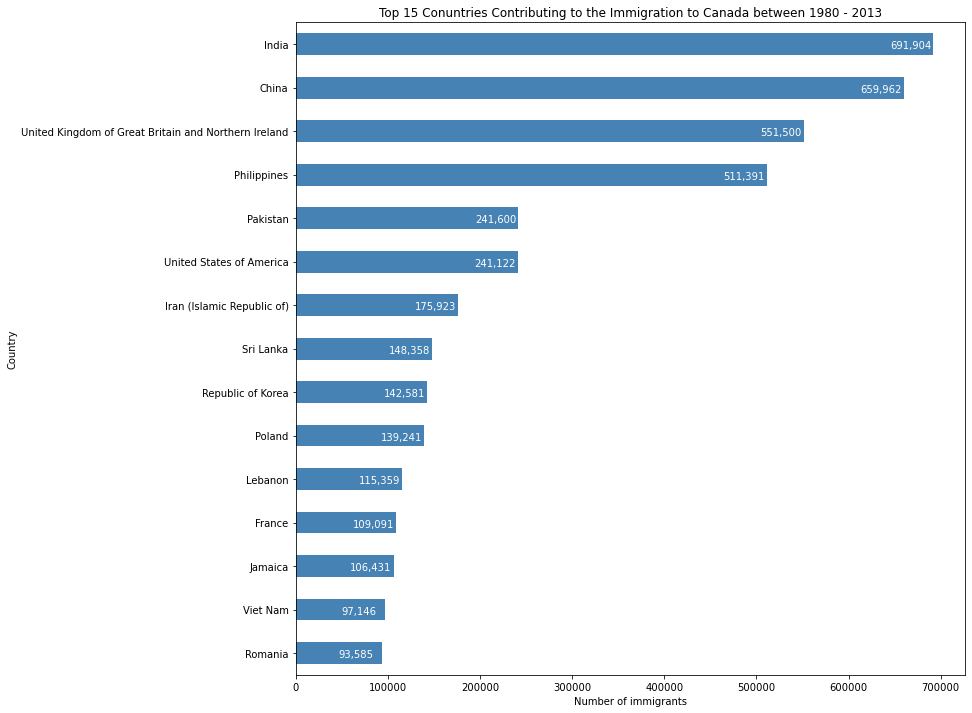

In [41]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Number of immigrants') # add to x-label to the plot
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.savefig('../figs/02_Basic/top15_immigration_countries_barh.png')
    
plt.show()